In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Feature engineering\\Dataset_Feature_Engineering.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
#Attrition target, wether the employee left the organization or not

In [4]:
df.shape

(1470, 35)

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#There are some variables whic need to be dropped first before starting Anything
#1) above 80-90% are missing values
#2) Same value for all rows
#3) Completely Unique Values for Each row
#4) No correlation at all with the Target Variable 

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
for i in df.columns:
    print(i, ':',df[i].value_counts())
    print('--'*40)
    print('--'*40)

Age : 35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Attrition : No     1233
Yes     237
Name: Attrition, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
BusinessTravel : Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---------------------------------------------------------------

In [9]:
for i in df.columns:
    print(i, ':',df[i].unique())
    print('--'*40)
    print('--'*40)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Attrition : ['Yes' 'No']
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 10

In [10]:
df=df.drop(['Over18','EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
df.shape

(1470, 31)

In [11]:
df[['RelationshipSatisfaction','JobSatisfaction','EnvironmentSatisfaction','JobInvolvement']]

,RelationshipSatisfaction,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement
0,1,4,2,3
1,4,2,3,2
2,2,3,4,2
3,3,3,4,3
4,4,2,1,3
...,...,...,...,...
1465,3,4,3,4
1466,1,1,4,2
1467,2,2,2,4
1468,4,2,4,2


In [12]:
df['TotalSatisfaction_mean']=(df['RelationshipSatisfaction']+df['JobSatisfaction']+df['EnvironmentSatisfaction']+df['JobInvolvement'])/5
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction_mean
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,2.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,2.2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,2.2
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,2.6
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,1,17,3,3,5,2,0,3,2.8
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,1,9,5,3,7,7,1,7,1.6
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,1,6,0,3,6,2,0,3,2.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,0,17,3,2,9,6,0,8,2.4


In [13]:
def Satif(df):
    if df['TotalSatisfaction_mean']>2.35:
        return 1
    else :
        return 0
df['Satif']=df.apply(lambda df:Satif(df),axis=1)

In [14]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction_mean,Satif
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,2.0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,2.2,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,2.2,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,2.6,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,1,17,3,3,5,2,0,3,2.8,1
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,9,5,3,7,7,1,7,1.6,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,1,6,0,3,6,2,0,3,2.0,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,0,17,3,2,9,6,0,8,2.4,1


In [15]:
df['JobSatisf_mean']=(df['JobSatisfaction']+df['JobInvolvement'])/2

In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalSatisfaction_mean', 'Satif', 'JobSatisf_mean'],
      dtype='object')

In [17]:
def MovingPeople(df):
    if df['NumCompaniesWorked']>4:
        return 1
    else:
        return 0
df['MovingPeople']=df.apply(lambda df:MovingPeople(df),axis=1)

In [18]:
df.shape

(1470, 35)

In [19]:
def LongDis(df):
    if df['DistanceFromHome'] > 11:
        return 1
    else :
        return 0
df['LongDis']=df.apply(lambda df:LongDis(df),axis=1)

In [20]:
def LongDisWL1(df):
    if df['DistanceFromHome']>11 and df['WorkLifeBalance']==1:
        return 1
    else :
        return 0
df['LongDisWL1']=df.apply(lambda df:LongDisWL1(df),axis=1)

In [21]:
def YoungAndBadPaid(df):
    if df['Age']<35 and df['Age']>23 and(df['MonthlyIncome']<3500):
        return 1
    else:
        return 0
df['YoungAndBadPaid']=df.apply(lambda df:YoungAndBadPaid(df),axis=1)

In [22]:
def MiddleTraining(df):
    if df['TrainingTimesLastYear']>=3 and df['TrainingTimesLastYear']<=6:
        return 1
    else:
        return 0
df['MiddleTraining']=df.apply(lambda df:MiddleTraining(df),axis=1)

In [23]:
def LongDisJL1(df) : 
    if  df['DistanceFromHome'] > 11 and df['JobLevel'] == 1 :
        return 1
    else : 
        return 0
df['LongDisJL1'] = df.apply(lambda df:LongDisJL1(df) ,axis = 1)

def ShortDisNotSingle(df) : 
    if  df['MaritalStatus'] != 'Single' and df['DistanceFromHome'] < 5:
        return 1
    else : 
        return 0
df['ShortDisNotSingle'] = df.apply(lambda df:ShortDisNotSingle(df) ,axis = 1)

def LongDisSingle(df) : 
    if  df['MaritalStatus'] == 'Single' and df['DistanceFromHome'] > 11:
        return 1
    else : 
        return 0
df['LongDisSingle'] = df.apply(lambda df:LongDisSingle(df) ,axis = 1)

def Engaged(df) : 
    if df['Age'] > 35 and df['MaritalStatus'] != 'Single':
        return 1
    else : 
        return 0
df['Engaged'] = df.apply(lambda df:Engaged(df) ,axis = 1)


def YoungNeverEngaged(df) : 
    if df['Age'] < 24 and df['MaritalStatus'] == 'Single' :
        return 1
    else : 
        return 0
df['YoungNeverEngaged'] = df.apply(lambda df:YoungNeverEngaged(df) ,axis = 1)

In [24]:
df['Time_in_each_comp'] = (df['Age'] - 20) / (df['NumCompaniesWorked'] + 1)

df['Income_Distance'] = df['MonthlyIncome'] / df['DistanceFromHome']

df['Stability'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df['Stability'].fillna((df['Stability'].mean()), inplace=True)


df['Income_YearsComp'] = df['MonthlyIncome'] / df['YearsAtCompany']
df['Income_YearsComp'] = df['Income_YearsComp'].replace(np.Inf, 0)

df['Fidelity'] = (df['NumCompaniesWorked']) / df['TotalWorkingYears']
df['Fidelity'] = df['Fidelity'].replace(np.Inf, 0)

In [25]:
df.Fidelity

0       1.000000
1       0.100000
2       0.857143
3       0.125000
4       1.500000
          ...   
1465    0.235294
1466    0.444444
1467    0.166667
1468    0.117647
1469    0.333333
Name: Fidelity, Length: 1470, dtype: float64

In [26]:
numeric_df= df.select_dtypes(include=[np.number])

categoric_df=df.select_dtypes(exclude=[np.number])

In [27]:
numeric_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,LongDisJL1,ShortDisNotSingle,LongDisSingle,Engaged,YoungNeverEngaged,Time_in_each_comp,Income_Distance,Stability,Income_YearsComp,Fidelity
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,2.333333,5993.000000,0.666667,998.833333,1.000000
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,1,0,14.500000,641.250000,0.700000,513.000000,0.100000
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,2.428571,1045.000000,0.596061,0.000000,0.857143
3,33,1392,3,4,4,56,3,1,3,2909,...,0,1,0,0,0,6.500000,969.666667,0.875000,363.625000,0.125000
4,27,591,2,1,1,40,3,1,2,3468,...,0,1,0,0,0,0.700000,1734.000000,1.000000,1734.000000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,0,0,1,0,3.200000,111.782609,0.400000,514.200000,0.235294
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,1,0,3.800000,1665.166667,1.000000,1427.285714,0.444444
1467,27,155,4,3,2,87,4,2,2,6142,...,0,1,0,0,0,3.500000,1535.500000,0.333333,1023.666667,0.166667
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,1,0,1,0,9.666667,2695.000000,0.666667,598.888889,0.117647


In [28]:
categoric_df

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [29]:

numericcol=numeric_df.columns.tolist()


categorycol=categoric_df.columns.tolist()

print ("Category :",categorycol)


print ("\n Numeric :",numericcol)


Category : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

 Numeric : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalSatisfaction_mean', 'Satif', 'JobSatisf_mean', 'MovingPeople', 'LongDis', 'LongDisWL1', 'YoungAndBadPaid', 'MiddleTraining', 'LongDisJL1', 'ShortDisNotSingle', 'LongDisSingle', 'Engaged', 'YoungNeverEngaged', 'Time_in_each_comp', 'Income_Distance', 'Stability', 'Income_YearsComp', 'Fidelity']


In [30]:
df=df.drop(['DailyRate','MonthlyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'TotalSatisfaction_mean'],axis=1)

In [31]:
### Coverting cateogrical to Numerical feature  ### One hot Encoding #### Get_Dummies
data = pd.get_dummies(df, columns=categorycol, drop_first=True)
data.columns
data.shape

(1470, 52)

In [32]:
data.columns

Index(['Age', 'Education', 'JobLevel', 'MonthlyIncome', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Satif',
       'JobSatisf_mean', 'MovingPeople', 'LongDis', 'LongDisWL1',
       'YoungAndBadPaid', 'MiddleTraining', 'LongDisJL1', 'ShortDisNotSingle',
       'LongDisSingle', 'Engaged', 'YoungNeverEngaged', 'Time_in_each_comp',
       'Income_Distance', 'Stability', 'Income_YearsComp', 'Fidelity',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager'

In [33]:
### COnvert everything in to int 
for i in data.columns:
    data[i]=data[i].astype(int)

data.shape

(1470, 52)

In [34]:
corr = data.corr()

In [35]:
corr

,Age,Education,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,0.208034,0.509604,0.497855,0.003634,0.001904,0.037510,0.680381,-0.021490,0.311309,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185,0.028062
Education,0.208034,1.000000,0.101589,0.094961,-0.011111,-0.024539,0.018422,0.148280,0.009819,0.069114,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168,-0.020322
JobLevel,0.509604,0.101589,1.000000,0.950300,-0.034730,-0.021222,0.013984,0.782208,0.037818,0.534739,...,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.050547,-0.087072,0.000544
MonthlyIncome,0.497855,0.094961,0.950300,1.000000,-0.027269,-0.017120,0.005408,0.772893,0.030683,0.514285,...,-0.320906,0.619573,0.055684,0.485818,-0.345180,0.047792,-0.201514,0.056767,-0.089361,0.006089
PercentSalaryHike,0.003634,-0.011111,-0.034730,-0.027269,1.000000,0.773550,0.007528,-0.020608,-0.003280,-0.035991,...,-0.020628,-0.005394,0.034682,-0.017017,0.032537,-0.046683,0.031102,0.020895,-0.001386,-0.005433
PerformanceRating,0.001904,-0.024539,-0.021222,-0.017120,0.773550,1.000000,0.003506,0.006744,0.002572,0.003435,...,0.010796,0.032050,0.029775,-0.035744,0.019416,-0.041401,-0.006214,0.009585,-0.001045,0.004369
StockOptionLevel,0.037510,0.018422,0.013984,0.005408,0.007528,0.003506,1.000000,0.010136,0.004129,0.015058,...,0.013386,-0.015637,0.007735,0.015807,-0.011635,0.015756,-0.048067,0.225574,-0.638957,-0.000449
TotalWorkingYears,0.680381,0.148280,0.782208,0.772893,-0.020608,0.006744,0.010136,1.000000,0.001008,0.628133,...,-0.215426,0.465837,0.064077,0.312148,-0.228119,-0.012241,-0.207726,0.053512,-0.089529,0.012754
WorkLifeBalance,-0.021490,0.009819,0.037818,0.030683,-0.003280,0.002572,0.004129,0.001008,1.000000,0.012089,...,-0.028209,0.005137,0.002011,0.034403,-0.058613,0.032092,0.045148,-0.006388,0.014921,-0.027092
YearsAtCompany,0.311309,0.069114,0.534739,0.514285,-0.035991,0.003435,0.015058,0.628133,0.012089,1.000000,...,-0.150181,0.330965,0.031968,0.153918,-0.154062,0.042602,-0.163464,0.044925,-0.070935,-0.011687


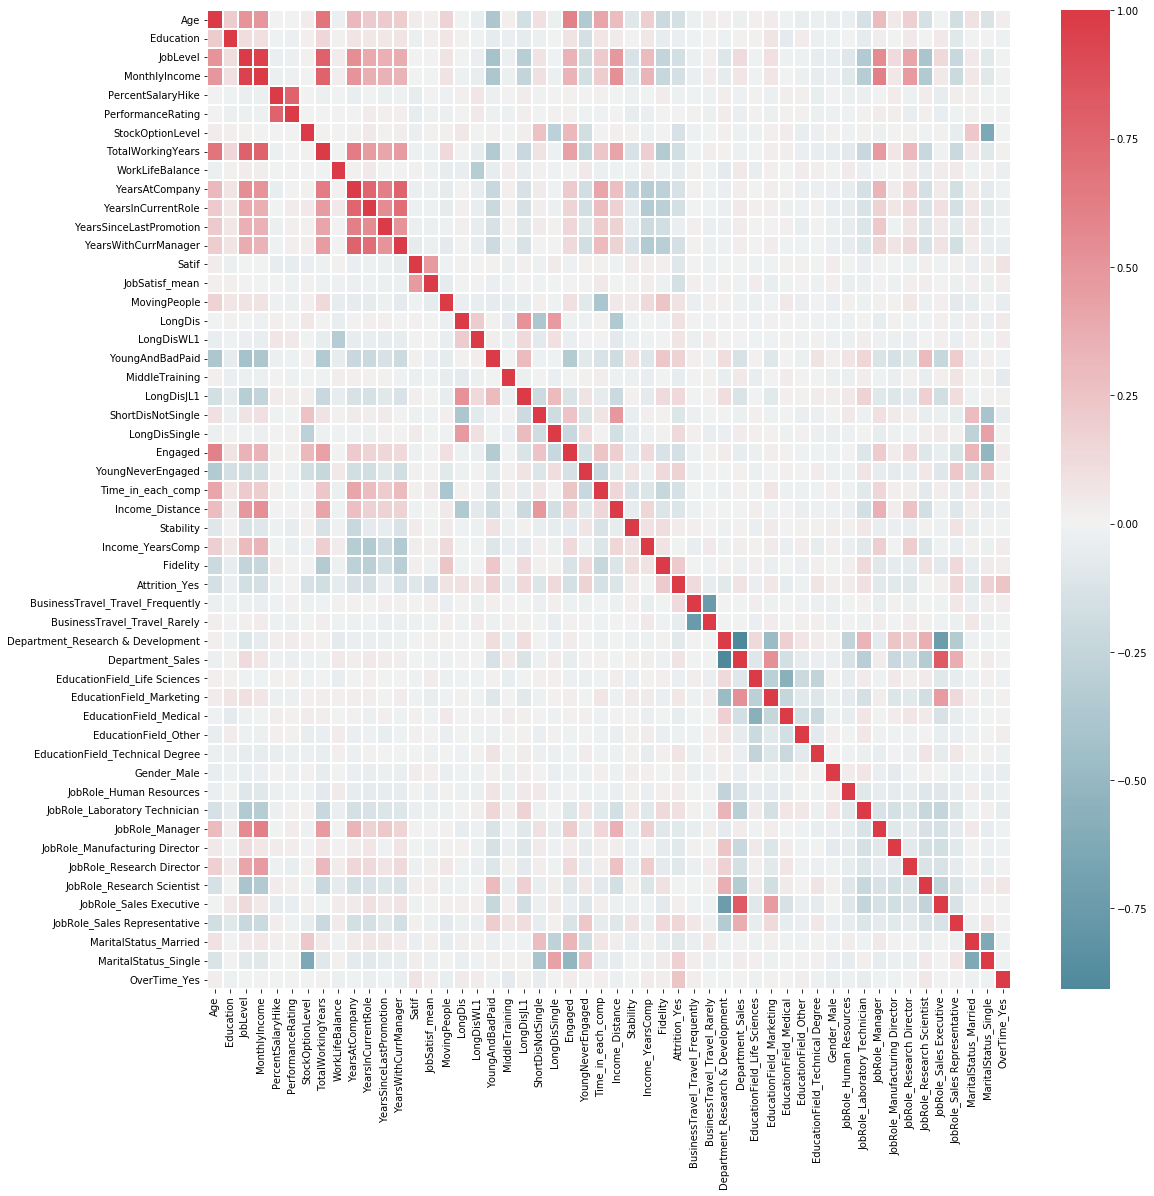

In [36]:
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [37]:
data.columns

Index(['Age', 'Education', 'JobLevel', 'MonthlyIncome', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Satif',
       'JobSatisf_mean', 'MovingPeople', 'LongDis', 'LongDisWL1',
       'YoungAndBadPaid', 'MiddleTraining', 'LongDisJL1', 'ShortDisNotSingle',
       'LongDisSingle', 'Engaged', 'YoungNeverEngaged', 'Time_in_each_comp',
       'Income_Distance', 'Stability', 'Income_YearsComp', 'Fidelity',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager'

In [38]:
data=data.drop(['Education','PercentSalaryHike','PerformanceRating','YearsSinceLastPromotion','Stability','Income_YearsComp','EducationField_Life Sciences','EducationField_Other','Gender_Male','JobRole_Human Resources','JobRole_Research Scientist','JobRole_Sales Executive'],axis=1)


In [39]:
data.shape

(1470, 40)

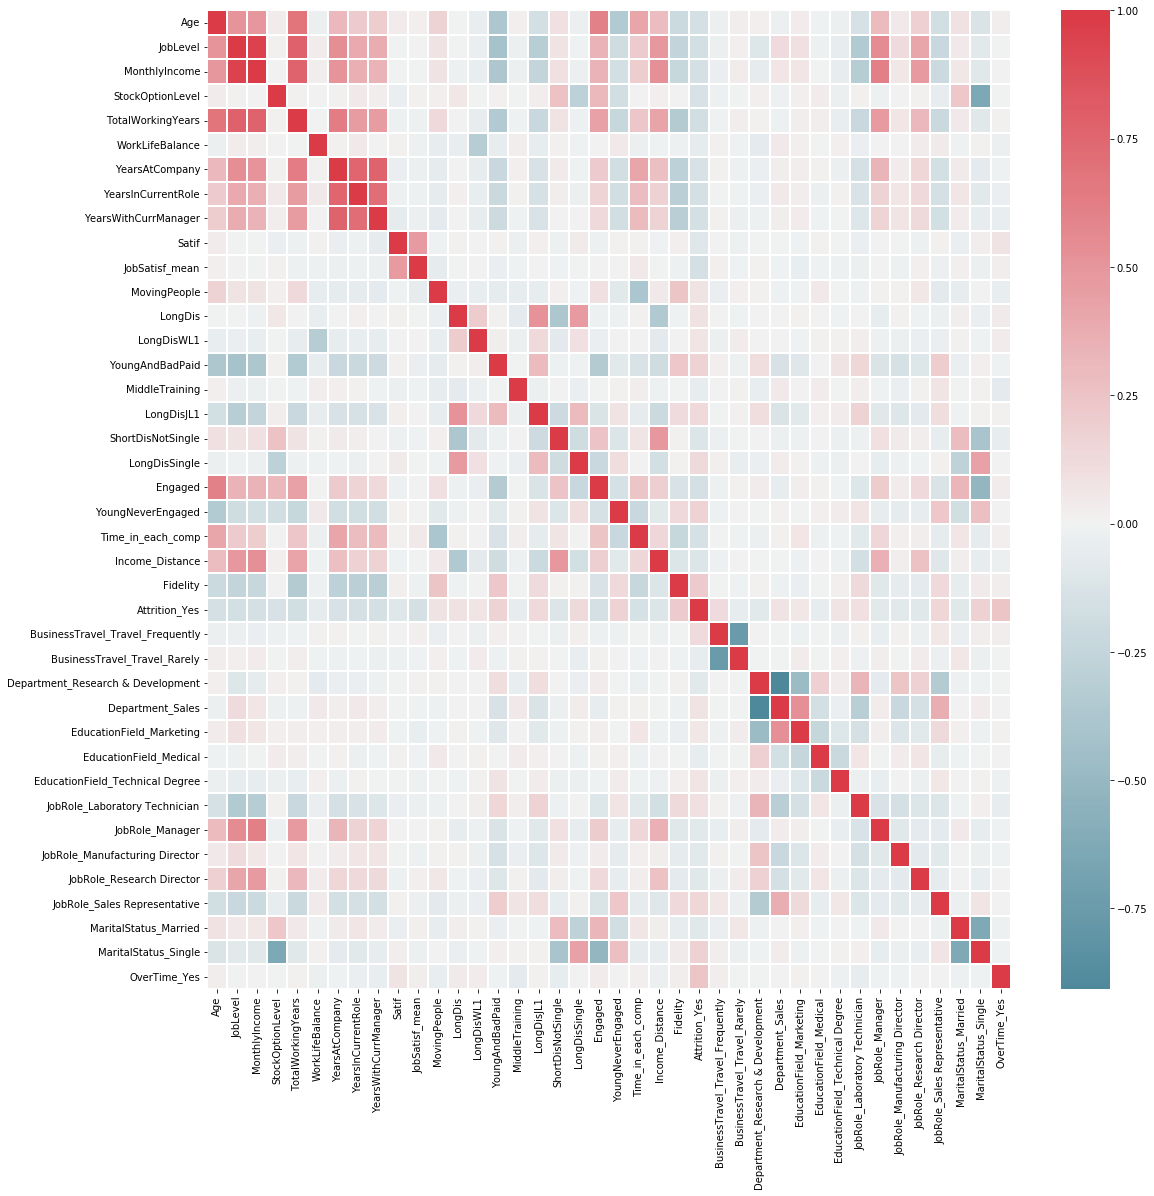

In [40]:
corr = data.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [41]:
x=data.drop('Attrition_Yes',axis=1)

In [42]:
x

,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Satif,...,EducationField_Medical,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,5993,0,8,1,6,4,5,0,...,0,0,0,0,0,0,0,0,1,1
1,49,2,5130,1,10,3,10,7,7,0,...,0,0,0,0,0,0,0,1,0,0
2,37,1,2090,0,7,3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,33,1,2909,0,8,3,8,7,0,1,...,0,0,0,0,0,0,0,1,0,1
4,27,1,3468,1,6,3,2,2,2,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,2571,1,17,3,5,2,3,1,...,1,0,1,0,0,0,0,1,0,0
1466,39,3,9991,1,9,3,7,7,7,0,...,1,0,0,0,0,0,0,1,0,0
1467,27,2,6142,1,6,3,6,2,3,0,...,0,0,0,0,1,0,0,1,0,1
1468,49,2,5390,0,17,2,9,6,8,1,...,1,0,0,0,0,0,0,1,0,0


In [43]:
from sklearn.preprocessing import StandardScaler 

In [44]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(x)

 
X = pd.DataFrame(x_transform,columns=x.columns)
X

,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Satif,...,EducationField_Medical,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,-0.057788,-0.108350,-0.932014,-0.421642,-2.493820,-0.164613,-0.063296,0.245834,-0.815340,...,-0.679141,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-0.057788,-0.291719,0.241988,-0.164511,0.338096,0.488508,0.764998,0.806541,-0.815340,...,-0.679141,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,-0.961486,-0.937654,-0.932014,-0.550208,0.338096,-1.144294,-1.167687,-1.155935,-0.815340,...,-0.679141,-0.314093,2.162331,-0.273059,-0.330808,-0.239904,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,-0.961486,-0.763634,-0.932014,-0.421642,0.338096,0.161947,0.764998,-1.155935,1.226482,...,-0.679141,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.961486,-0.644858,0.241988,-0.678774,0.338096,-0.817734,-0.615492,-0.595227,-0.815340,...,1.472448,-0.314093,2.162331,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.057788,-0.835451,0.241988,0.735447,0.338096,-0.327893,-0.615492,-0.314873,1.226482,...,1.472448,-0.314093,2.162331,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
1466,0.227347,0.845911,0.741140,0.241988,-0.293077,0.338096,-0.001333,0.764998,0.806541,-0.815340,...,1.472448,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
1467,-1.086676,-0.057788,-0.076690,0.241988,-0.678774,0.338096,-0.164613,-0.615492,-0.314873,-0.815340,...,-0.679141,-0.314093,-0.462464,-0.273059,3.022901,-0.239904,-0.244625,1.088232,-0.685565,1.591746
1468,1.322365,-0.057788,-0.236474,-0.932014,0.735447,-1.077862,0.325228,0.488900,1.086895,1.226482,...,1.472448,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X.dropna()
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] =X.columns
vif
# Higher VIF scores says the feature can be explaindex by other Variables 

,VIF Factor,features
0,3.925128,Age
1,13.955231,JobLevel
2,18.294017,MonthlyIncome
3,1.901110,StockOptionLevel
4,5.446589,TotalWorkingYears
5,1.153432,WorkLifeBalance
6,4.809579,YearsAtCompany
7,2.757174,YearsInCurrentRole
8,2.885577,YearsWithCurrManager
9,1.330116,Satif


In [46]:
X=X.drop(['JobLevel','MonthlyIncome','Department_Research & Development'],axis=1)
x

,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Satif,...,EducationField_Medical,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,5993,0,8,1,6,4,5,0,...,0,0,0,0,0,0,0,0,1,1
1,49,2,5130,1,10,3,10,7,7,0,...,0,0,0,0,0,0,0,1,0,0
2,37,1,2090,0,7,3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,33,1,2909,0,8,3,8,7,0,1,...,0,0,0,0,0,0,0,1,0,1
4,27,1,3468,1,6,3,2,2,2,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,2571,1,17,3,5,2,3,1,...,1,0,1,0,0,0,0,1,0,0
1466,39,3,9991,1,9,3,7,7,7,0,...,1,0,0,0,0,0,0,1,0,0
1467,27,2,6142,1,6,3,6,2,3,0,...,0,0,0,0,1,0,0,1,0,1
1468,49,2,5390,0,17,2,9,6,8,1,...,1,0,0,0,0,0,0,1,0,0


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x.dropna()
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns
vif

,VIF Factor,features
0,3.915387,Age
1,1.896160,StockOptionLevel
2,4.460964,TotalWorkingYears
3,1.146496,WorkLifeBalance
4,4.768151,YearsAtCompany
5,2.748229,YearsInCurrentRole
6,2.868955,YearsWithCurrManager
7,1.328131,Satif
8,1.322998,JobSatisf_mean
9,1.526855,MovingPeople


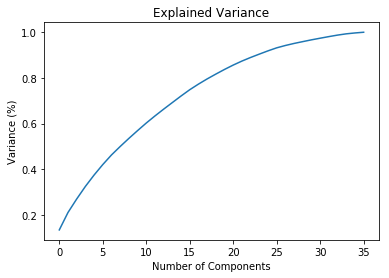

In [48]:
from sklearn.decomposition import PCA

pca = PCA()


principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [49]:
pca.explained_variance_ratio_#first coponent can explain 13% of targetvariable, second variable 7%

array([0.13360731, 0.07635113, 0.05914881, 0.05511729, 0.04989019,
       0.04587408, 0.0421315 , 0.03704175, 0.03551837, 0.03413179,
       0.03320384, 0.03110068, 0.02978265, 0.0288929 , 0.02876116,
       0.02754295, 0.02448938, 0.02277332, 0.02121925, 0.02041616,
       0.01913632, 0.0175008 , 0.01581007, 0.01468234, 0.01432119,
       0.01322863, 0.01029944, 0.00896377, 0.00797729, 0.00779661,
       0.0071663 , 0.00702286, 0.00660344, 0.00552495, 0.00385965,
       0.00311181])

In [50]:
pca = PCA(n_components=22)
new_data = pca.fit_transform(X)

In [51]:
principal_x = pd.DataFrame(new_data,columns=[  f"column{i}" for i in range (22)])

In [52]:
principal_x

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21
0,-0.844554,0.770167,-1.689476,-0.946398,-1.697705,1.330760,0.783033,1.216744,0.823983,2.389714,...,0.010897,-0.705625,0.989968,-1.048608,1.130113,1.203019,-0.384772,-0.306259,0.079786,-1.542044
1,1.998487,-0.233909,0.514771,0.624970,2.674368,0.116960,0.907827,-0.470549,0.649958,-1.089241,...,1.018494,0.486028,-0.123028,-0.234029,-0.093191,0.540085,-0.532720,-0.464890,0.669965,-0.229963
2,-2.219031,0.124150,-0.668386,-2.057142,-1.263275,0.279025,1.114002,-0.332323,0.582763,-0.466683,...,0.727166,-0.187578,1.230556,-0.725548,0.887535,-1.065724,-0.248032,0.001099,-1.183196,0.970375
3,-0.563498,-1.035916,-0.194906,-0.008887,3.089603,0.341086,-1.650725,0.878675,-0.152168,0.570452,...,0.040982,-1.153258,0.060544,-0.613698,0.676023,-1.627276,-1.721030,-0.229528,-0.097242,0.255477
4,-2.260653,-3.127321,0.230443,-1.835692,-0.373176,-1.270484,1.513781,1.260688,-1.599582,0.242675,...,-0.148969,-0.050395,-0.966657,-0.443627,1.183470,0.327966,-1.170995,0.744870,0.441433,0.462010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.105935,-0.894928,2.065719,-0.095971,2.340178,2.077833,-1.350614,-0.860837,-0.930347,-1.246583,...,0.948515,1.693327,-0.133671,0.259967,-0.670472,-0.260567,-0.625090,0.208806,-0.401252,0.342411
1466,1.149235,-0.917407,0.482230,-0.275792,-0.350907,-1.631063,1.604955,-0.819976,0.056695,-1.424793,...,0.504106,0.422273,-0.251847,-0.708388,-0.617052,-0.139896,-0.456379,0.549226,0.217795,-0.280795
1467,-0.283975,-1.782893,-0.098323,-0.563789,-0.056273,-0.933505,-0.826138,-1.687055,1.627579,0.920923,...,-2.033705,-0.738836,0.164574,0.090432,0.988348,-0.843627,-0.863922,-0.666789,-0.254466,0.318491
1468,2.406752,-0.488856,-0.490043,0.391818,2.372516,1.202843,-0.020544,0.745177,0.537750,-0.913494,...,0.695447,0.557127,-1.108831,-0.170532,0.063951,0.551396,-1.375535,1.408091,-0.613868,-0.697207


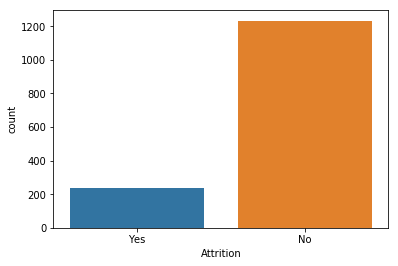

In [53]:
sns.countplot(df['Attrition'])
plt.show()